In [ ]:
import numpy as np
import torch
from torch.nn import Conv2d
from PIL import Image
import matplotlib.pyplot as plt
import requests
from scipy.ndimage import zoom as resize

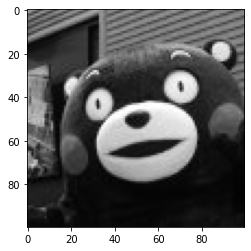

In [ ]:
url_image = "https://raw.githubusercontent.com/Machine-Learning-Tokyo/__init__/main/session_02/kumamon.jpeg"
im = Image.open(requests.get(url_image, stream=True).raw).convert("L")
plt.imshow(im, cmap="gray")
plt.show()
im = np.array(im)

In [ ]:
kernel_size = 7
dilation = 1
stride = 1
padding = 3
# Define a 2D convolutions
conv_1 = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel_size,
              dilation=dilation, padding=padding)

kernel_size = 7
dilation = 2
stride = 1
padding = 6 # NOTE this is also different
conv_2 = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel_size,
              dilation=dilation, padding=padding)

# Use the same weights and bias
conv_2.weight.data = conv_1.weight.data
conv_2.bias.data = conv_1.bias.data

In [ ]:
# 1) Downsampling 100x100 -> 50x50
im1 = resize(im, (0.5, 0.5)).reshape(1, 1, 50, 50) # B, C, H, W

# 2) Apply the convolution to that image
input_image = torch.Tensor(im1)
output_image = conv_1(input_image).detach().numpy()[0, 0]

# 3) Upsample
upsampled = resize(output_image, (2, 2))

In [ ]:
im2 = im.reshape(1, 1, 100, 100) # B, C, H, W

# Apply the convolution to that image
input_image = torch.Tensor(im2)
output_image = conv_2(input_image).detach().numpy()[0, 0]

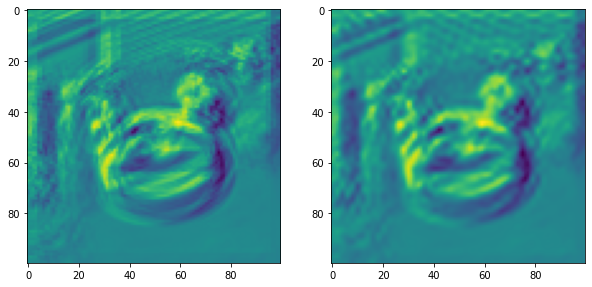

In [ ]:
# Plot Figures
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(output_image)
plt.subplot(122)
plt.imshow(upsampled)
plt.show()